## 1. 导入数据

### 导入python库

In [69]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

%matplotlib inline

### 导入数据

In [13]:
filename = "housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
datasets = pd.read_csv(filename,names=names,delim_whitespace=True)

## 2. 数据概要

### 数据预览

In [14]:
set_option("precision",1)
datasets.head(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.3e-03,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296.0,15.3,396.9,5.0,24.0
1,2.7e-02,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242.0,17.8,396.9,9.1,21.6
2,2.7e-02,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242.0,17.8,392.8,4.0,34.7
3,3.2e-02,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222.0,18.7,394.6,2.9,33.4
4,6.9e-02,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222.0,18.7,396.9,5.3,36.2
5,3.0e-02,0.0,2.2,0,0.5,6.4,58.7,6.1,3,222.0,18.7,394.1,5.2,28.7
6,8.8e-02,12.5,7.9,0,0.5,6.0,66.6,5.6,5,311.0,15.2,395.6,12.4,22.9
7,1.4e-01,12.5,7.9,0,0.5,6.2,96.1,6.0,5,311.0,15.2,396.9,19.1,27.1
8,2.1e-01,12.5,7.9,0,0.5,5.6,100.0,6.1,5,311.0,15.2,386.6,29.9,16.5
9,1.7e-01,12.5,7.9,0,0.5,6.0,85.9,6.6,5,311.0,15.2,386.7,17.1,18.9


### 数据维度

In [6]:
datasets.shape

(506, 14)

### 特征数据类型

In [8]:
datasets.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 统计信息概要

In [15]:
datasets.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


### 特征相关性

In [17]:
set_option("precision",3)
datasets.corr(method="pearson")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


## 3. 数据可视化

### 单变量绘图

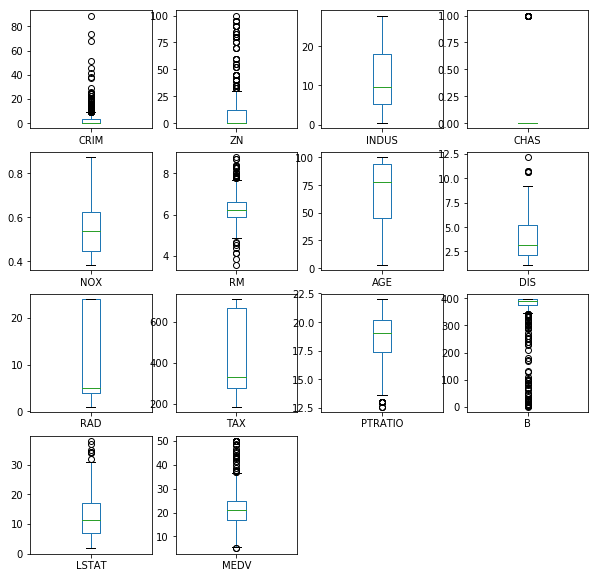

In [29]:
datasets.plot(kind="box",subplots=True,layout=(4,4),figsize=(10,10))
plt.show()

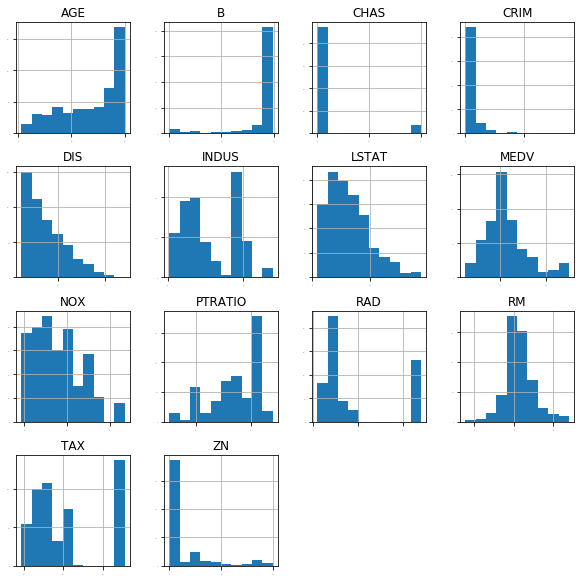

In [23]:
datasets.hist(figsize=(10,10),xlabelsize=1,ylabelsize=1)
plt.show()

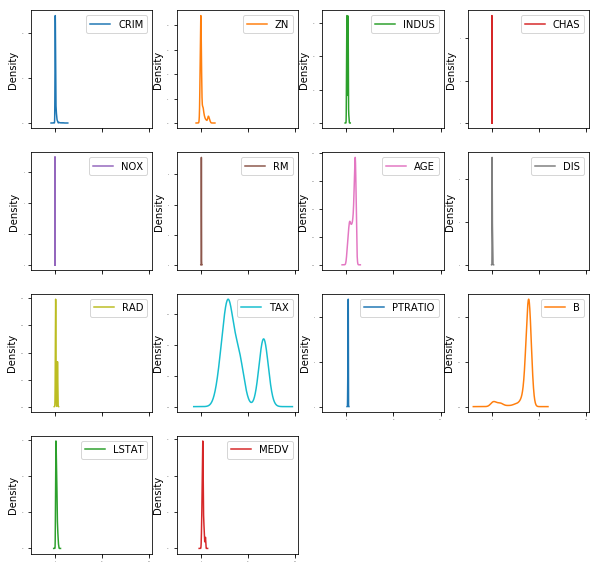

In [28]:
datasets.plot(kind="density",subplots=True,layout=(4,4),figsize=(10,10),fontsize=1)
plt.show()

### 多变量绘图

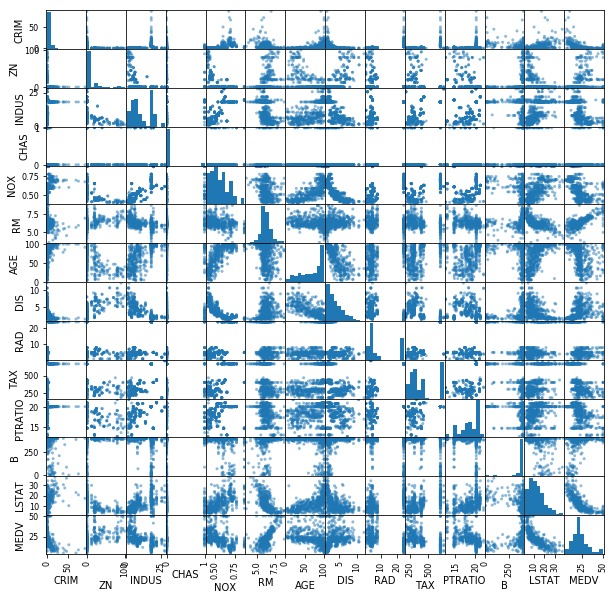

In [31]:
scatter_matrix(datasets,figsize=(10,10))
plt.show()

### 特性相关性可视化

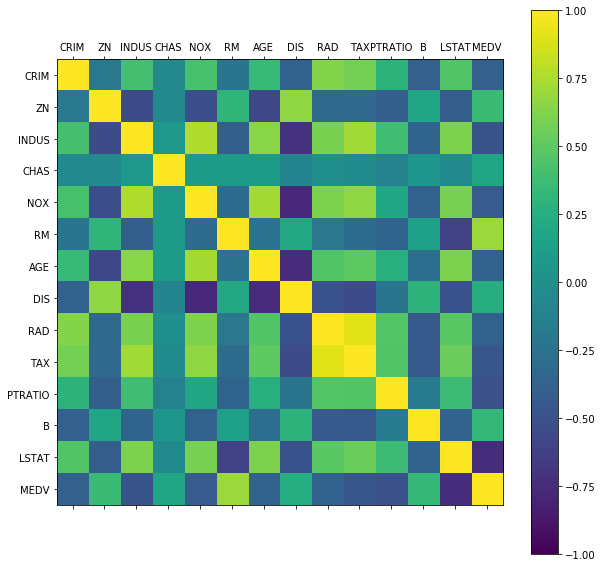

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(datasets.corr(),vmin=-1,vmax=1,interpolation="none")
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## 4. 划分数据集

### 创建验证集

In [35]:
array = datasets.values
X = array[:,0:13]
y = array[:,13]
test_size = 0.20
seed = 7
X_train,X_validation,y_train,y_validation = train_test_split(X,y,
        test_size=test_size,random_state=seed)

## 5. 算法度量：基准

In [37]:
seed = 7
num_fold = 10
scoring = "neg_mean_squared_error"

### 建立多个模型

In [44]:
models = []
models.append(("LR",LinearRegression()))
models.append(("LASSO",Lasso()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("EN",ElasticNet()))
models.append(("DT",DecisionTreeRegressor()))
models.append(("SVM",SVR()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=num_fold,random_state=seed)
    result = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(result)
    names.append(name)
    print("{}:  Error Mean:{:.6f} (Error Std:{:.6f})".format(name,result.mean(),result.std()))

LR:  Error Mean:-21.379856 (Error Std:9.414264)
LASSO:  Error Mean:-26.423561 (Error Std:11.651110)
KNN:  Error Mean:-41.896488 (Error Std:13.901688)
EN:  Error Mean:-27.502259 (Error Std:12.305022)
DT:  Error Mean:-26.073734 (Error Std:12.595251)
SVM:  Error Mean:-85.518342 (Error Std:31.994798)


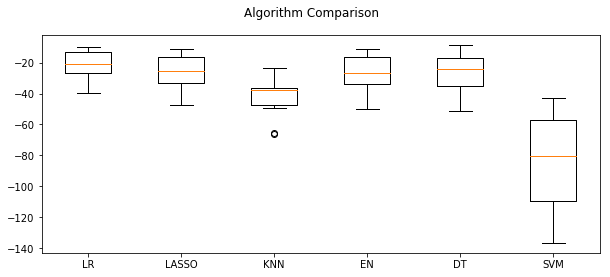

In [45]:
fig = plt.figure(figsize=(10,4))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. 算法度量：标准化

In [57]:
pipeline = []
pipeline.append(("ScalerLR", Pipeline([("Scaler",StandardScaler()),
                                     ("LR", LinearRegression())])))
pipeline.append(("ScalerLASSO", Pipeline([("Scaler",StandardScaler()),
                                        ("LASSP", Lasso())])))
pipeline.append(("ScalerEN", Pipeline([("Scaler",StandardScaler()),
                                     ("EN", ElasticNet())])))
pipeline.append(("ScalerKNN", Pipeline([("Scaler",StandardScaler()),
                                        ("KNN", KNeighborsRegressor())])))
pipeline.append(("ScalerDT", Pipeline([("Scaler",StandardScaler()),
                                     ("DT", DecisionTreeRegressor())])))
pipeline.append(("ScalerSVM", Pipeline([("Scaler",StandardScaler()),
                                        ("SVM", SVR())])))
names = []
results = []
for name,model in pipeline:
    kfold = KFold(n_splits=num_fold,random_state=seed)
    result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(result)
    names.append(name)
    print("{}:  Error Mean:{:.6f} (Error Std:{:.6f})".format(
        name,result.mean(),result.std()))

ScalerLR:  Error Mean:-21.379856 (Error Std:9.414264)
ScalerLASSO:  Error Mean:-26.607314 (Error Std:8.978761)
ScalerEN:  Error Mean:-27.932372 (Error Std:10.587490)
ScalerKNN:  Error Mean:-20.107620 (Error Std:12.376949)
ScalerDT:  Error Mean:-25.982682 (Error Std:12.064340)
ScalerSVM:  Error Mean:-29.633086 (Error Std:17.009186)


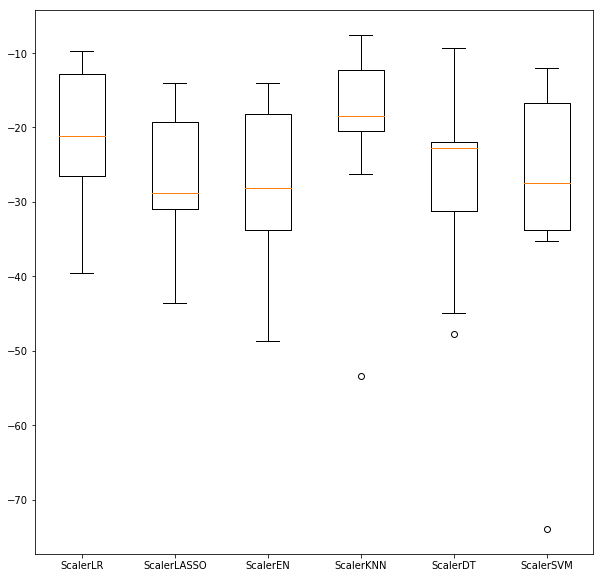

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 7. 提升结果

In [63]:
X_train_scaler = StandardScaler().fit_transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = {"n_neighbors":k_values}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_fold, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,cv=kfold)
grid_result = grid.fit(X_train_scaler,y_train)

In [64]:
print("Best:{} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best:-18.172136963696367 using {'n_neighbors': 3}


In [68]:
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,std,param in zip(means,stds,params):
    print("{:.4f}({:.4f}) with:{}".format(mean,std,param))

-20.2087(15.0297) with:{'n_neighbors': 1}
-18.1721(12.9506) with:{'n_neighbors': 3}
-20.1312(12.2037) with:{'n_neighbors': 5}
-20.5758(12.3459) with:{'n_neighbors': 7}
-20.3683(11.6217) with:{'n_neighbors': 9}
-21.0092(11.6100) with:{'n_neighbors': 11}
-21.1518(11.9433) with:{'n_neighbors': 13}
-21.5574(11.5363) with:{'n_neighbors': 15}
-22.7899(11.5669) with:{'n_neighbors': 17}
-23.8719(11.3404) with:{'n_neighbors': 19}
-24.3614(11.9148) with:{'n_neighbors': 21}


## 8. 集成方法

In [73]:
ensembles = []
ensembles.append(("ScalerAB",Pipeline([("Scaler",StandardScaler()),
                                       ("AB",AdaBoostRegressor())])))
ensembles.append(("ScalerGBM",Pipeline([("Scaler",StandardScaler()),
                                       ("GBM",GradientBoostingRegressor())])))
ensembles.append(("ScalerRF",Pipeline([("Scaler",StandardScaler()),
                                       ("RF",RandomForestRegressor())])))
ensembles.append(("ScalerET",Pipeline([("Scaler",StandardScaler()),
                                       ("ET",ExtraTreesRegressor())])))
names = []
results = []
for name,model in ensembles:
    kfold = KFold(n_splits=num_fold,random_state=seed)
    result = cross_val_score(model,X_train,y_train,scoring=scoring,cv=kfold)
    names.append(name)
    results.append(result)
    print("{}  Mean:{:.4f}(Std{:.4f})".format(name,result.mean(),result.std()))

ScalerAB  Mean:-14.9051(Std7.0595)
ScalerGBM  Mean:-10.2777(Std4.5782)
ScalerRF  Mean:-13.7138(Std7.1941)
ScalerET  Mean:-11.3862(Std5.8821)


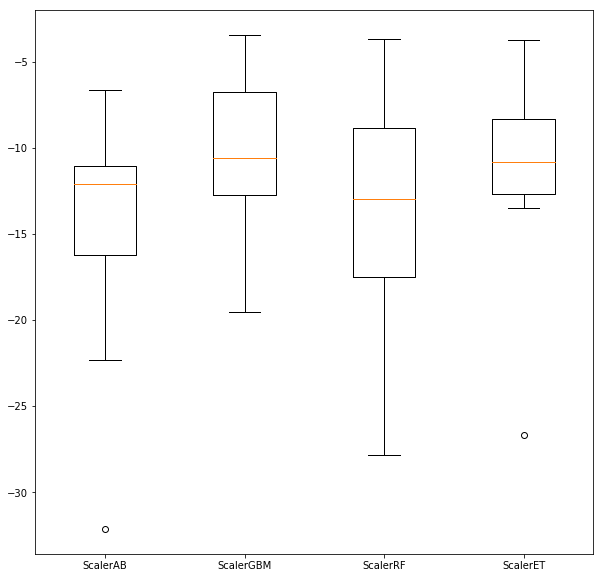

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 9. 集成方法结果提升

## 10. 最终模型

In [50]:
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(predictions,y_validation))
print(confusion_matrix(predictions,y_validation))
print(classification_report(predictions,y_validation))

0.933333333333
[[ 7  0  0]
 [ 0 10  0]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.85      0.92        13

    avg / total       0.94      0.93      0.93        30

